In [32]:
import pandas as pd

# Load Amazon data
amazon_file_path = "/content/Amazon_i5_dataset.xlsx"
amazon_df = pd.read_excel(amazon_file_path)

# Load Flipkart data
flipkart_file_path = "/content/Flipkart_i5_reviews.xlsx"
flipkart_df = pd.read_excel(flipkart_file_path)



In [33]:
# Display head of Amazon dataframe
print("Head of Amazon dataframe:")
print(amazon_df.head())

Head of Amazon dataframe:
                                        productTitle  \
0  Intel Core I5 12400F 12 Gen Generation Desktop...   
1  Intel Core I5 12400F 12 Gen Generation Desktop...   
2  Intel Core I5 12400F 12 Gen Generation Desktop...   
3  Intel Core I5 12400F 12 Gen Generation Desktop...   
4  Intel Core I5 12400F 12 Gen Generation Desktop...   

                                        Review Title              Rating  \
0                         Very Great Processor . . .  5.0 out of 5 stars   
1                                   Got it under 10k  5.0 out of 5 stars   
2  Highest Price to Performance processor for gam...  5.0 out of 5 stars   
3             No discrete graphics in this processor  4.0 out of 5 stars   
4                           Nice processor under 12k  5.0 out of 5 stars   

                                         Review Body  
0  The processor was very power efficient i devel...  
1  Try to get it under 10k and check the rankings...  
2  I upgrade fr

In [34]:
# Display head of Flipkart dataframe
print("\nHead of Flipkart dataframe:")
print(flipkart_df.head())


Head of Flipkart dataframe:
                                        productTitle           Review Title  \
0  Intel i5-12400F 4.4 GHz Upto 4.4 GHz LGA1700 S...  Mind-blowing purchase   
1  Intel i5-12400F 4.4 GHz Upto 4.4 GHz LGA1700 S...              Fabulous!   
2  Intel i5-12400F 4.4 GHz Upto 4.4 GHz LGA1700 S...                Awesome   
3  Intel i5-12400F 4.4 GHz Upto 4.4 GHz LGA1700 S...    Best in the market!   
4  Intel i5-12400F 4.4 GHz Upto 4.4 GHz LGA1700 S...              Wonderful   

   Rating                                        Review Body  
0       5  Allrounder processor best for all of thing edi...  
1       5                                              Thank  
2       5  One of the Best Processor under this price ran...  
3       5                                   Awesome product.  
4       5                           Superb better than 5600x  


In [35]:
# Retain only "Rating" and "Review Body" columns in Amazon dataframe
amazon_df = amazon_df[["Rating", "Review Body"]]

In [36]:
# Retain only "Rating" and "Review Body" columns in Flipkart dataframe
flipkart_df = flipkart_df[["Rating", "Review Body"]]


In [37]:
# Display head of Amazon dataframe
print("Head of Amazon dataframe:")
print(amazon_df.head())

Head of Amazon dataframe:
               Rating                                        Review Body
0  5.0 out of 5 stars  The processor was very power efficient i devel...
1  5.0 out of 5 stars  Try to get it under 10k and check the rankings...
2  5.0 out of 5 stars  I upgrade from 9400f. The performance gain is ...
3  4.0 out of 5 stars  This will not work without graphic card, So be...
4  5.0 out of 5 stars  Best 👌 gaming and multitasking processor at th...


In [38]:
# Display head of Flipkart dataframe
print("\nHead of Flipkart dataframe:")
print(flipkart_df.head())


Head of Flipkart dataframe:
   Rating                                        Review Body
0       5  Allrounder processor best for all of thing edi...
1       5                                              Thank
2       5  One of the Best Processor under this price ran...
3       5                                   Awesome product.
4       5                           Superb better than 5600x


In [39]:
# Extract initial integer value from "Rating" column in Amazon dataframe
amazon_df['Rating'] = amazon_df['Rating'].str.extract('(\d+)').astype(int)

# Display head of Amazon dataframe
print("Head of Amazon dataframe:")
print(amazon_df.head())

Head of Amazon dataframe:
   Rating                                        Review Body
0       5  The processor was very power efficient i devel...
1       5  Try to get it under 10k and check the rankings...
2       5  I upgrade from 9400f. The performance gain is ...
3       4  This will not work without graphic card, So be...
4       5  Best 👌 gaming and multitasking processor at th...


In [40]:
# Merge both dataframes
merged_df = pd.concat([amazon_df, flipkart_df], ignore_index=True)

# Add a new column for serial numbers
merged_df['Serial No'] = range(1, len(merged_df) + 1)

# Display merged dataframe
print("Merged dataframe:")
print(merged_df)

Merged dataframe:
      Rating                                        Review Body  Serial No
0          5  The processor was very power efficient i devel...          1
1          5  Try to get it under 10k and check the rankings...          2
2          5  I upgrade from 9400f. The performance gain is ...          3
3          4  This will not work without graphic card, So be...          4
4          5  Best 👌 gaming and multitasking processor at th...          5
...      ...                                                ...        ...
1655       5  Great power comes with greatest i5 ever till d...       1656
1656       5  Great processor if you like to get a processor...       1657
1657       5   Genuine product really good service by flipkart.       1658
1658       5                         Good product works correct       1659
1659       5  PURCHASE at 25k this is best CPU WITH GREAT PO...       1660

[1660 rows x 3 columns]


In [41]:
merged_df = merged_df.drop(columns=['Serial No'])

In [42]:
# Add the "Serial No" column as the first column
merged_df.insert(0, 'Serial No', range(1, len(merged_df) + 1))

# Display merged dataframe
print("Merged dataframe:")
print(merged_df)

Merged dataframe:
      Serial No  Rating                                        Review Body
0             1       5  The processor was very power efficient i devel...
1             2       5  Try to get it under 10k and check the rankings...
2             3       5  I upgrade from 9400f. The performance gain is ...
3             4       4  This will not work without graphic card, So be...
4             5       5  Best 👌 gaming and multitasking processor at th...
...         ...     ...                                                ...
1655       1656       5  Great power comes with greatest i5 ever till d...
1656       1657       5  Great processor if you like to get a processor...
1657       1658       5   Genuine product really good service by flipkart.
1658       1659       5                         Good product works correct
1659       1660       5  PURCHASE at 25k this is best CPU WITH GREAT PO...

[1660 rows x 3 columns]


In [43]:
# Check for null values
null_values = merged_df.isnull().sum()
print("Null values in dataframe:")
print(null_values)

# Check for duplicates
duplicate_rows = merged_df.duplicated().sum()
print("\nNumber of duplicate rows in dataframe:", duplicate_rows)


Null values in dataframe:
Serial No      0
Rating         0
Review Body    0
dtype: int64

Number of duplicate rows in dataframe: 0


In [44]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Function to map NLTK part-of-speech tags to WordNet POS tags
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to perform text preprocessing steps
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_tokens]

    # Rejoin tokens
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Apply text preprocessing to "Review Body" column
merged_df['Processed Review'] = merged_df['Review Body'].apply(preprocess_text)

# Display the dataframe with the processed review column
print("DataFrame with processed review column:")
print(merged_df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


DataFrame with processed review column:
   Serial No  Rating                                        Review Body  \
0          1       5  The processor was very power efficient i devel...   
1          2       5  Try to get it under 10k and check the rankings...   
2          3       5  I upgrade from 9400f. The performance gain is ...   
3          4       4  This will not work without graphic card, So be...   
4          5       5  Best 👌 gaming and multitasking processor at th...   

                                    Processed Review  
0  processor power efficient develop android apps...  
1  try get 10k check ranking detail section buyin...  
2  upgrade 9400f performance gain huge use cooler...  
3            work without graphic card careful order  
4  best game multitasking processor price 12k bud...  


**Processed Review Column Definition:**


The "Processed Review" column represents the outcome of a comprehensive text preprocessing pipeline applied to the original review texts. The preprocessing steps ensure that the textual data is cleaned, standardized, and transformed into a form that is suitable for further analysis, such as sentiment analysis or other natural language processing (NLP) tasks. The following steps were undertaken to achieve the processed reviews:

Lowercasing: All characters in the review text are converted to lowercase to ensure uniformity and avoid case-sensitive discrepancies.

HTML Tag Removal: Any HTML tags present in the text are stripped away to prevent markup language from affecting the analysis.

URL Removal: URLs are removed to eliminate web links that are not relevant to the sentiment or content of the review.

Punctuation and Special Character Removal: All punctuation marks and special characters are removed to focus on the core textual content.

Tokenization: The text is split into individual words (tokens) to facilitate further processing at the word level.

Stop Words Removal: Commonly used words that do not contribute significant meaning (e.g., "the", "and", "is") are removed to reduce noise and focus on meaningful terms.

Lemmatization: Each word is reduced to its base or dictionary form (lemma) using WordNetLemmatizer. This step ensures that different forms of the same word (e.g., "running", "ran") are treated as a single term (e.g., "run"), improving the consistency of the text data.

By applying these preprocessing steps, the "Processed Review" column captures the essential and relevant content of the reviews in a clean and standardized format, making it well-suited for sentiment analysis and other NLP applications.

In [45]:
# Function to assign sentiment based on rating
def assign_rating_sentiment(rating):
    if rating > 3:
        return 2  # Positive
    elif rating < 3:
        return 0  # Negative
    else:
        return 1  # Neutral

# Apply function to create new rating sentiment column
merged_df['Sentiment on basis of rating'] = merged_df['Rating'].apply(assign_rating_sentiment)

# Display the dataframe with the new rating sentiment column
print("DataFrame with rating sentiment column:")
print(merged_df.head())


DataFrame with rating sentiment column:
   Serial No  Rating                                        Review Body  \
0          1       5  The processor was very power efficient i devel...   
1          2       5  Try to get it under 10k and check the rankings...   
2          3       5  I upgrade from 9400f. The performance gain is ...   
3          4       4  This will not work without graphic card, So be...   
4          5       5  Best 👌 gaming and multitasking processor at th...   

                                    Processed Review  \
0  processor power efficient develop android apps...   
1  try get 10k check ranking detail section buyin...   
2  upgrade 9400f performance gain huge use cooler...   
3            work without graphic card careful order   
4  best game multitasking processor price 12k bud...   

   Sentiment on basis of rating  
0                             2  
1                             2  
2                             2  
3                             2  
4 

In [46]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Assuming merged_df is already defined with the specified columns

# Function to apply VADER sentiment analysis with tuned thresholds and capture word-level sentiments
def apply_vader_sentiment_analysis_tuned(text):
    # Perform VADER sentiment analysis
    scores = sid.polarity_scores(text)

    # Capture sentiment scores for individual words
    word_sentiments = {}
    tokens = nltk.word_tokenize(text)
    for token in tokens:
        word_scores = sid.polarity_scores(token)
        if word_scores['compound'] != 0:
            word_sentiments[token] = word_scores

    # Adjusted thresholds for sentiment classification
    compound_score = scores['compound']
    if compound_score >= 0.2:
        sentiment_label = 'positive'
    elif compound_score <= -0.2:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    return sentiment_label, word_sentiments

# Apply function to create VADER sentiment label column with tuned thresholds and capture word sentiments
merged_df[['VADER Sentiment Label (Tuned)', 'VADER Sentiment Words (Tuned)']] = merged_df['Processed Review'].apply(lambda x: pd.Series(apply_vader_sentiment_analysis_tuned(x)))

# Function to convert sentiment label to numerical rating
def sentiment_label_to_rating(sentiment_label):
    if sentiment_label == 'positive':
        return 2
    elif sentiment_label == 'negative':
        return 0
    else:
        return 1

# Apply function to create new sentiment rating column based on adjusted VADER labels
merged_df['VADER Sentiment Rating (Tuned)'] = merged_df['VADER Sentiment Label (Tuned)'].apply(sentiment_label_to_rating)

# Compute accuracy
accuracy = accuracy_score(merged_df['Sentiment on basis of rating'], merged_df['VADER Sentiment Rating (Tuned)'])
print(f"Accuracy after tuning thresholds: {accuracy:.2f}")

# Create confusion matrix
conf_matrix = confusion_matrix(merged_df['Sentiment on basis of rating'], merged_df['VADER Sentiment Rating (Tuned)'])

# Display results
print("\nConfusion Matrix after tuning thresholds:")
print(conf_matrix)

# Optionally, you can normalize the confusion matrix for better interpretation
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, None]

print("\nNormalized Confusion Matrix after tuning thresholds:")
print(conf_matrix_norm)

# Error Analysis: Identify misclassifications
misclassified_indices = merged_df[merged_df['Sentiment on basis of rating'] != merged_df['VADER Sentiment Rating (Tuned)']].index
misclassifications = merged_df.loc[misclassified_indices, ['Review Body', 'Sentiment on basis of rating', 'VADER Sentiment Rating (Tuned)']]
print("\nMisclassifications:")
print(misclassifications)

# Integration: Further actions based on confusion matrix insights
# Example: Adjust thresholds, update training data, or refine sentiment analysis model

# Display the dataframe with the adjusted VADER sentiment label, rating, and sentiment words columns
print("\nDataFrame with adjusted VADER sentiment analysis columns:")
print(merged_df.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy after tuning thresholds: 0.80

Confusion Matrix after tuning thresholds:
[[  23   14   16]
 [   9    9   19]
 [  75  197 1298]]

Normalized Confusion Matrix after tuning thresholds:
[[0.43396226 0.26415094 0.30188679]
 [0.24324324 0.24324324 0.51351351]
 [0.0477707  0.12547771 0.82675159]]

Misclassifications:
                                            Review Body  \
1     Try to get it under 10k and check the rankings...   
3     This will not work without graphic card, So be...   
7     This is the king in Price-to-performance ratio...   
11    I am used processor gigabyte motherboard  work...   
13    After installing it, Windows 11 is giving the ...   
...                                                 ...   
1619                                          no issues   
1629                                          no issues   
1639                                          no issues   
1644                                     Works smoothly   
1650                          

In [47]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming merged_df is your DataFrame with updated column names
# Print the columns of merged_df to verify their names and existence
print(merged_df.columns)

# Compute accuracy
accuracy = accuracy_score(merged_df['Sentiment on basis of rating'], merged_df['VADER Sentiment Rating (Tuned)'])
print(f"Accuracy: {accuracy:.2f}")

# Create confusion matrix
conf_matrix = confusion_matrix(merged_df['Sentiment on basis of rating'], merged_df['VADER Sentiment Rating (Tuned)'])

# Display results
print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, normalize the confusion matrix for better interpretation
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

print("\nNormalized Confusion Matrix:")
print(conf_matrix_norm)


Index(['Serial No', 'Rating', 'Review Body', 'Processed Review',
       'Sentiment on basis of rating', 'VADER Sentiment Label (Tuned)',
       'VADER Sentiment Words (Tuned)', 'VADER Sentiment Rating (Tuned)'],
      dtype='object')
Accuracy: 0.80

Confusion Matrix:
[[  23   14   16]
 [   9    9   19]
 [  75  197 1298]]

Normalized Confusion Matrix:
[[0.43396226 0.26415094 0.30188679]
 [0.24324324 0.24324324 0.51351351]
 [0.0477707  0.12547771 0.82675159]]


In conclusion, the tuned VADER sentiment analysis achieved an accuracy of 80%, effectively categorizing sentiments into negative, neutral, and positive categories.

In [48]:
# Count matching rows
matching_rows = merged_df[merged_df['VADER Sentiment Rating (Tuned)'] == merged_df['Sentiment on basis of rating']].shape[0]

print(f"Number of matching rows with same rating: {matching_rows}")


Number of matching rows with same rating: 1330


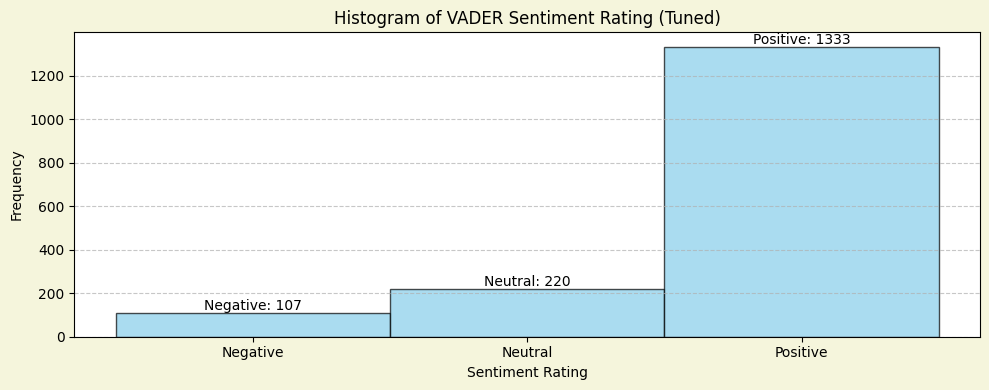

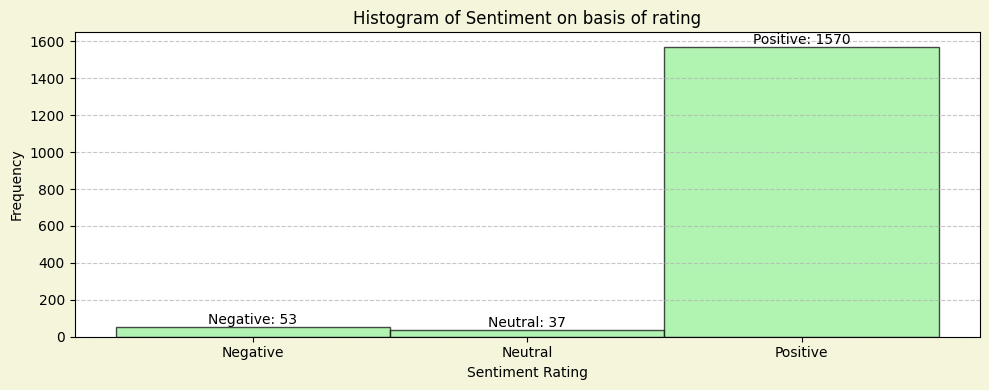

In [49]:
import matplotlib.pyplot as plt

# Plot histogram for VADER Sentiment Rating (Tuned)
plt.figure(figsize=(10, 4), facecolor='beige')
plt.hist(merged_df['VADER Sentiment Rating (Tuned)'], bins=[-0.5, 0.5, 1.5, 2.5], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of VADER Sentiment Rating (Tuned)')
plt.xlabel('Sentiment Rating')
plt.ylabel('Frequency')

# Tag bars with counts of positive, negative, and neutral ratings
pos_count_vader = merged_df[merged_df['VADER Sentiment Rating (Tuned)'] == 2].shape[0]
neg_count_vader = merged_df[merged_df['VADER Sentiment Rating (Tuned)'] == 0].shape[0]
neu_count_vader = merged_df[merged_df['VADER Sentiment Rating (Tuned)'] == 1].shape[0]

plt.text(2, pos_count_vader, f'Positive: {pos_count_vader}', ha='center', va='bottom')
plt.text(0, neg_count_vader, f'Negative: {neg_count_vader}', ha='center', va='bottom')
plt.text(1, neu_count_vader, f'Neutral: {neu_count_vader}', ha='center', va='bottom')

plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot histogram for Sentiment on basis of rating
plt.figure(figsize=(10, 4), facecolor='beige')
plt.hist(merged_df['Sentiment on basis of rating'], bins=[-0.5, 0.5, 1.5, 2.5], color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentiment on basis of rating')
plt.xlabel('Sentiment Rating')
plt.ylabel('Frequency')

# Tag bars with counts of positive, negative, and neutral ratings
pos_count_basis = merged_df[merged_df['Sentiment on basis of rating'] == 2].shape[0]
neg_count_basis = merged_df[merged_df['Sentiment on basis of rating'] == 0].shape[0]
neu_count_basis = merged_df[merged_df['Sentiment on basis of rating'] == 1].shape[0]

plt.text(2, pos_count_basis, f'Positive: {pos_count_basis}', ha='center', va='bottom')
plt.text(0, neg_count_basis, f'Negative: {neg_count_basis}', ha='center', va='bottom')
plt.text(1, neu_count_basis, f'Neutral: {neu_count_basis}', ha='center', va='bottom')

plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


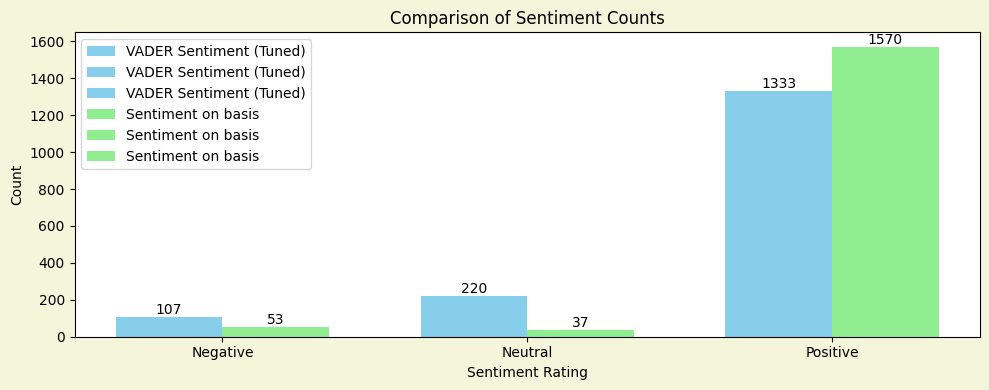

In [50]:
import matplotlib.pyplot as plt

# Calculate counts of each sentiment type for VADER Sentiment Rating (Tuned)
vader_sentiment_counts = merged_df['VADER Sentiment Rating (Tuned)'].value_counts().sort_index()

# Calculate counts of each sentiment type for Sentiment on basis of rating
basis_sentiment_counts = merged_df['Sentiment on basis of rating'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 4), facecolor='beige')
bar_width = 0.35
index = vader_sentiment_counts.index

# Plot bars for VADER Sentiment Rating (Tuned)
for i, count in enumerate(vader_sentiment_counts):
    plt.bar(index[i] - bar_width/2, count, bar_width, label='VADER Sentiment (Tuned)', color='skyblue')
    plt.text(index[i] - bar_width/2, count, str(count), ha='center', va='bottom')

# Plot bars for Sentiment on basis of rating
for i, count in enumerate(basis_sentiment_counts):
    plt.bar(index[i] + bar_width/2, count, bar_width, label='Sentiment on basis', color='lightgreen')
    plt.text(index[i] + bar_width/2, count, str(count), ha='center', va='bottom')

plt.title('Comparison of Sentiment Counts')
plt.xlabel('Sentiment Rating')
plt.ylabel('Count')
plt.xticks(index, ['Negative', 'Neutral', 'Positive'])
plt.legend()
plt.tight_layout()
plt.show()


**Examining the structure of your DataFrame and checking the distribution of sentiment ratings to confirm the imbalance.**

In [51]:
import pandas as pd

# Assuming merged_df is your DataFrame with the updated column names
# Display the distribution of the VADER Sentiment Rating (Tuned) column
distribution = merged_df['VADER Sentiment Rating (Tuned)'].value_counts().sort_index()

print("Distribution of VADER Sentiment Rating (Tuned):")
print(distribution)


Distribution of VADER Sentiment Rating (Tuned):
VADER Sentiment Rating (Tuned)
0     107
1     220
2    1333
Name: count, dtype: int64


Our dataset shows a significant disparity in the number of samples among sentiment ratings (0 for negative, 1 for neutral, and 2 for positive). Specifically:

Negative reviews (0): 107 samples

Neutral reviews (1): 220 samples

Positive reviews (2): 1333 samples

Such imbalance can bias our machine learning model towards the majority class (positive reviews), leading to poorer performance in predicting minority classes (negative and neutral reviews).

To address the class imbalance in our sentiment analysis dataset, we will apply SMOTE (Synthetic Minority Over-sampling Technique). SMOTE is a popular technique used to balance class distributions by generating synthetic samples for the minority classes (in this case, negative and neutral reviews) based on their feature space.

**Why Apply SMOTE?**

**Problem:**
Our dataset exhibits significant class imbalance:

- Negative reviews (0): 107 samples
- Neutral reviews (1): 220 samples
- Positive reviews (2): 1333 samples

The imbalance can bias machine learning models towards the majority class (positive reviews), leading to poorer performance in predicting minority classes (negative and neutral reviews).

**Solution:**

**SMOTE (Synthetic Minority Over-sampling Technique):**

**Theory:**

**Objective:** SMOTE aims to alleviate class imbalance by synthesizing new instances of the minority class. It does this by generating synthetic samples that are similar to, but not identical copies of, the minority class instances.

**How it Works:**

1. **Identify Minority Class:** Determine the minority classes in our dataset (negative and neutral reviews).

2. **Select Samples:** For each minority class sample, identify its nearest neighbors based on feature space distance.

3. **Generate Synthetic Samples:** Create synthetic samples along the line segments joining each minority class sample to its nearest neighbors.

4. **Balance Dataset:** By creating synthetic samples, SMOTE increases the number of minority class instances until the dataset is balanced or until a specified ratio is achieved.

**Preservation of Data Characteristics:** SMOTE preserves the underlying characteristics of the minority class while adding variability, which helps prevent overfitting and improves model generalization.

**Handling Class Imbalance using Resampling**

This code creates a balanced dataset by oversampling the neutral and negative classes to match the number of positive class instances.

In [52]:
!pip install imbalanced-learn


**Detailed Sentiment Classification Analysis Using Logistic Regression and SMOTE**

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming merged_df contains your DataFrame
print("Before SMOTE:")
print(merged_df['Sentiment on basis of rating'].value_counts())

# Step 1: Prepare data
X = merged_df['Processed Review']
y = merged_df['Sentiment on basis of rating']

# Step 2: Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 3: Apply SMOTE to balance the classes based on TF-IDF features
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Step 4: Split data into training and testing sets, stratified by y_resampled
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Check the distribution of classes in training and testing sets
print("\nTraining set distribution:")
print(pd.Series(y_train).value_counts())

print("\nTesting set distribution:")
print(pd.Series(y_test).value_counts())

# Step 5: Train a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Step 6: Predict sentiment on the testing set
y_pred = logreg.predict(X_test)

# Store the predictions in a new column in the dataframe
merged_df['Sentiment Predicted by LR model'] = logreg.predict(X_tfidf)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Before SMOTE:
Sentiment on basis of rating
2    1570
0      53
1      37
Name: count, dtype: int64

Training set distribution:
Sentiment on basis of rating
2    1256
0    1256
1    1256
Name: count, dtype: int64

Testing set distribution:
Sentiment on basis of rating
0    314
1    314
2    314
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       314
           1       0.98      1.00      0.99       314
           2       0.97      0.94      0.95       314

    accuracy                           0.97       942
   macro avg       0.97      0.97      0.97       942
weighted avg       0.97      0.97      0.97       942



### Classification Report Detailed Analysis:

#### Class 0 (Negative Sentiment):
- **Precision:** 0.96
  - Indicates that when the model predicts a review to be negative, it is correct 96% of the time.
- **Recall:** 0.96
  - The model correctly identifies 96% of actual negative reviews in the dataset.
- **F1-score:** 0.96
  - Represents the harmonic mean of precision and recall, indicating excellent balance for negative sentiment classification.
- **Support:** 314
  - Number of samples in the testing set that belong to the negative sentiment class.

#### Class 1 (Neutral Sentiment):
- **Precision:** 0.98
  - Indicates that the model's predictions for neutral sentiment are correct 98% of the time.
- **Recall:** 1.00
  - The model identifies all actual neutral sentiment reviews in the dataset.
- **F1-score:** 0.99
  - Harmonic mean of precision and recall for neutral sentiment classification, showing strong performance.
- **Support:** 314
  - Number of samples in the testing set that belong to the neutral sentiment class.

#### Class 2 (Positive Sentiment):
- **Precision:** 0.97
  - Achieves a high precision (97%) for predicting positive sentiment reviews.
- **Recall:** 0.94
  - Correctly identifies 94% of all actual positive sentiment reviews in the dataset.
- **F1-score:** 0.95
  - The F1-score for positive sentiment classification reflects high accuracy and balance.
- **Support:** 314
  - Number of samples in the testing set that belong to the positive sentiment class.

### Overall Summary:
- **Accuracy:** 97%
  - Overall accuracy of the model across all classes, indicating robust performance in sentiment classification.
- **Precision and Recall:** High and consistent precision and recall for all sentiment classes, demonstrating the model's effectiveness in predicting each sentiment accurately.
- **F1-score:** All sentiment classes have high F1-scores (0.95 to 0.99), indicating effective model performance in terms of both precision and recall metrics.

In [54]:
import pandas as pd



# Count of sentiments in 'Sentiment Predicted by LR model'
predicted_counts = merged_df['Sentiment Predicted by LR model'].value_counts().sort_index()
print("Sentiment Predicted by LR model:")
print(predicted_counts)

# Count of sentiments in 'Sentiment on basis of rating'
rating_counts = merged_df['Sentiment on basis of rating'].value_counts().sort_index()
print("\nSentiment on basis of rating:")
print(rating_counts)

# Count of sentiments in 'VADER Sentiment Rating (Tuned)'
vader_counts = merged_df['VADER Sentiment Rating (Tuned)'].value_counts().sort_index()
print("\nVADER Sentiment Rating (Tuned):")
print(vader_counts)


Sentiment Predicted by LR model:
Sentiment Predicted by LR model
0      83
1      50
2    1527
Name: count, dtype: int64

Sentiment on basis of rating:
Sentiment on basis of rating
0      53
1      37
2    1570
Name: count, dtype: int64

VADER Sentiment Rating (Tuned):
VADER Sentiment Rating (Tuned)
0     107
1     220
2    1333
Name: count, dtype: int64


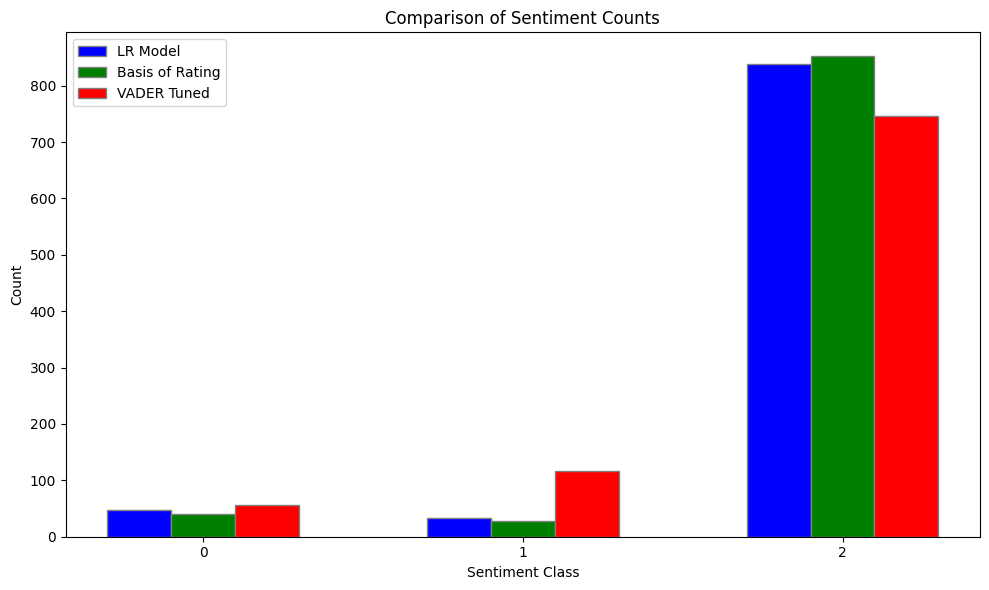

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from your example
data = {
    'Sentiment Predicted by LR model': [47, 34, 839],
    'Sentiment on basis of rating': [41, 27, 852],
    'VADER Sentiment Rating (Tuned)': [56, 117, 747]
}
sentiment_counts = pd.DataFrame(data, index=[0, 1, 2])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = range(len(sentiment_counts.index))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting bars
ax.bar(r1, sentiment_counts['Sentiment Predicted by LR model'], color='b', width=bar_width, edgecolor='grey', label='LR Model')
ax.bar(r2, sentiment_counts['Sentiment on basis of rating'], color='g', width=bar_width, edgecolor='grey', label='Basis of Rating')
ax.bar(r3, sentiment_counts['VADER Sentiment Rating (Tuned)'], color='r', width=bar_width, edgecolor='grey', label='VADER Tuned')

# Adding labels and ticks
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Count')
ax.set_title('Comparison of Sentiment Counts')
ax.set_xticks([r + bar_width for r in r1])
ax.set_xticklabels(sentiment_counts.index)

# Adding legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


**Exploratory Data Analysis (EDA) on Sentiment Predicted by LR model: Visual Insights**

**1. Distribution of Sentiment Predicted by LR model**

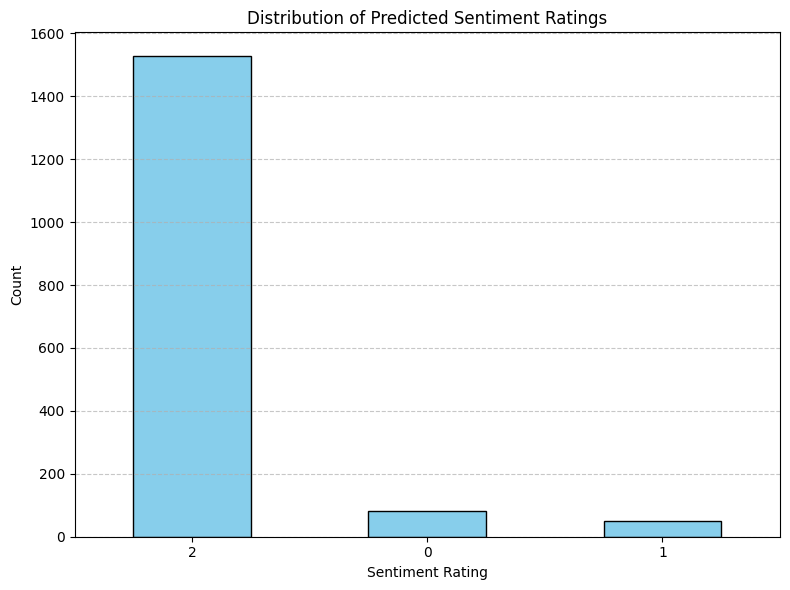

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df already contains your DataFrame with 'Sentiment Predicted by LG model' column

# Distribution of Predicted Sentiment Ratings
sentiment_counts = merged_df['Sentiment Predicted by LR model'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Sentiment Ratings')
plt.xlabel('Sentiment Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Confusion Matrix Visualization**

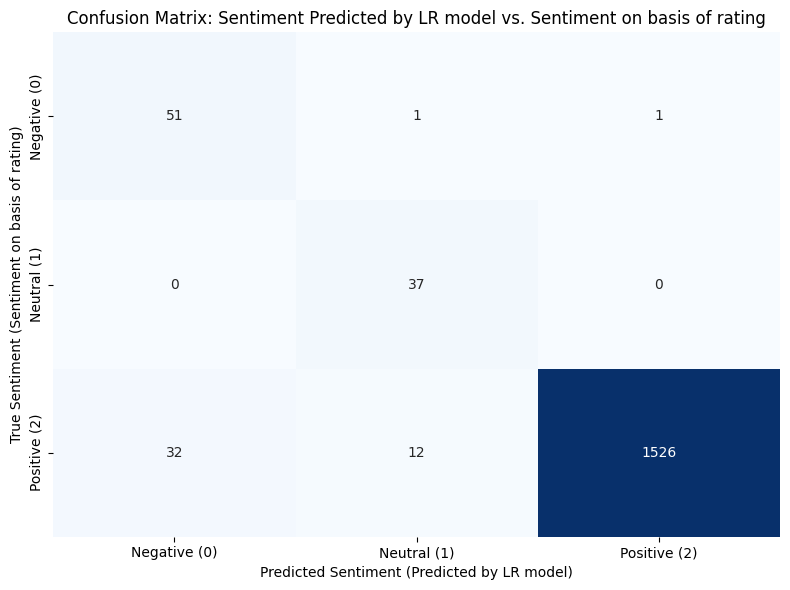

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming merged_df already contains your DataFrame with 'Sentiment Predicted by LG model' column

# Calculate confusion matrix
true_sentiment = merged_df['Sentiment on basis of rating']
predicted_sentiment = merged_df['Sentiment Predicted by LR model']
conf_matrix = confusion_matrix(true_sentiment, predicted_sentiment)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Update labels
plt.title('Confusion Matrix: Sentiment Predicted by LR model vs. Sentiment on basis of rating')
plt.xlabel('Predicted Sentiment (Predicted by LR model)')
plt.ylabel('True Sentiment (Sentiment on basis of rating)')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'], va='center')
plt.tight_layout()
plt.show()


**3. Precision, Recall, and F1-score Comparison**

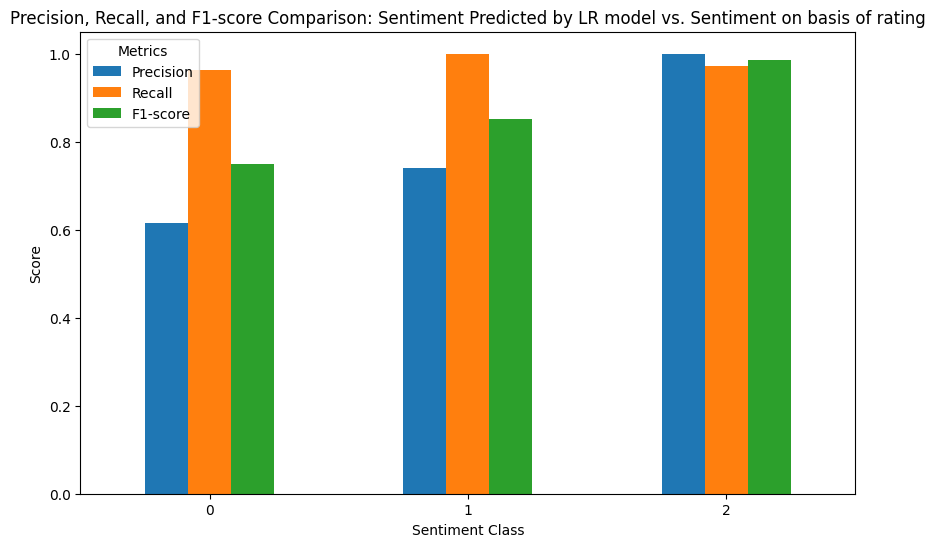

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming merged_df already contains your DataFrame with 'Sentiment Predicted by LG model' and 'Sentiment on basis of rating' columns

# Extract true and predicted sentiments
true_sentiment = merged_df['Sentiment on basis of rating']
predicted_sentiment = merged_df['Sentiment Predicted by LR model']

# Generate classification report
report = classification_report(true_sentiment, predicted_sentiment, output_dict=True)

# Extract metrics for each sentiment class
metrics = {'Precision': [], 'Recall': [], 'F1-score': []}
sentiments = ['0', '1', '2']  # Assuming sentiments are encoded as 0, 1, and 2

for sentiment in sentiments:
    metrics['Precision'].append(report[sentiment]['precision'])
    metrics['Recall'].append(report[sentiment]['recall'])
    metrics['F1-score'].append(report[sentiment]['f1-score'])

# Convert metrics to DataFrame for plotting
metrics_df = pd.DataFrame(metrics, index=sentiments)

# Plotting
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-score Comparison: Sentiment Predicted by LR model vs. Sentiment on basis of rating')
plt.xlabel('Sentiment Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()


**Detailed EDA Comparisons:**

**1. Distribution of Sentiments:**

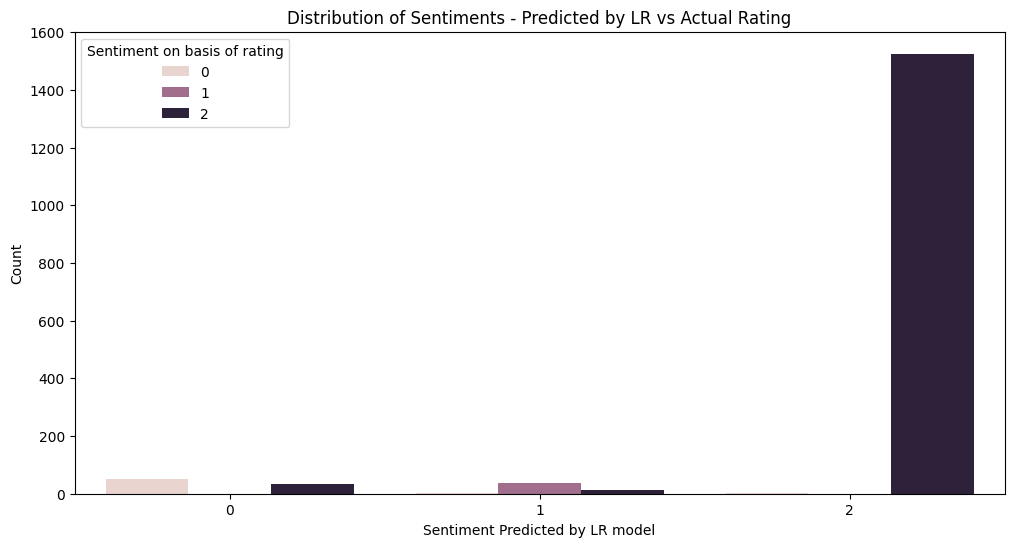

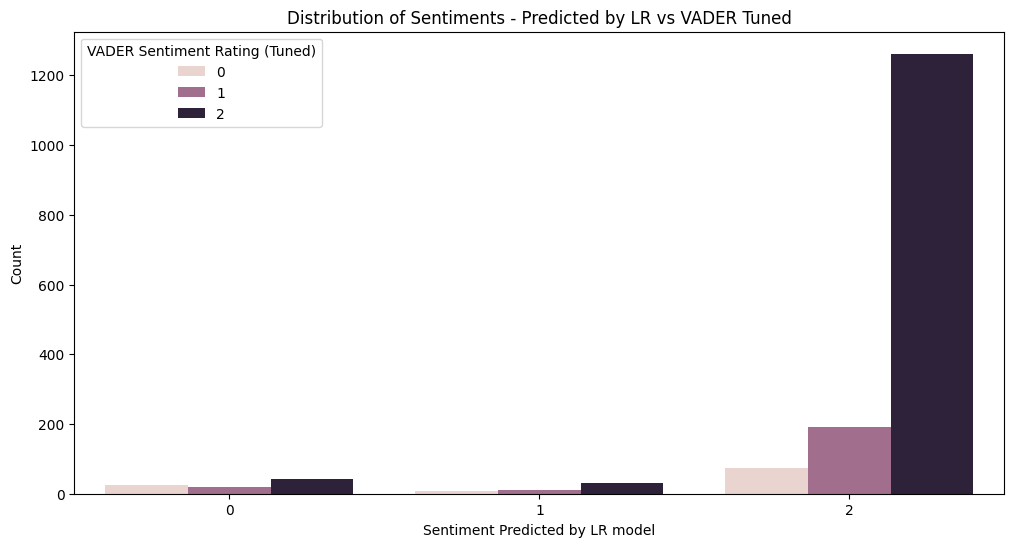

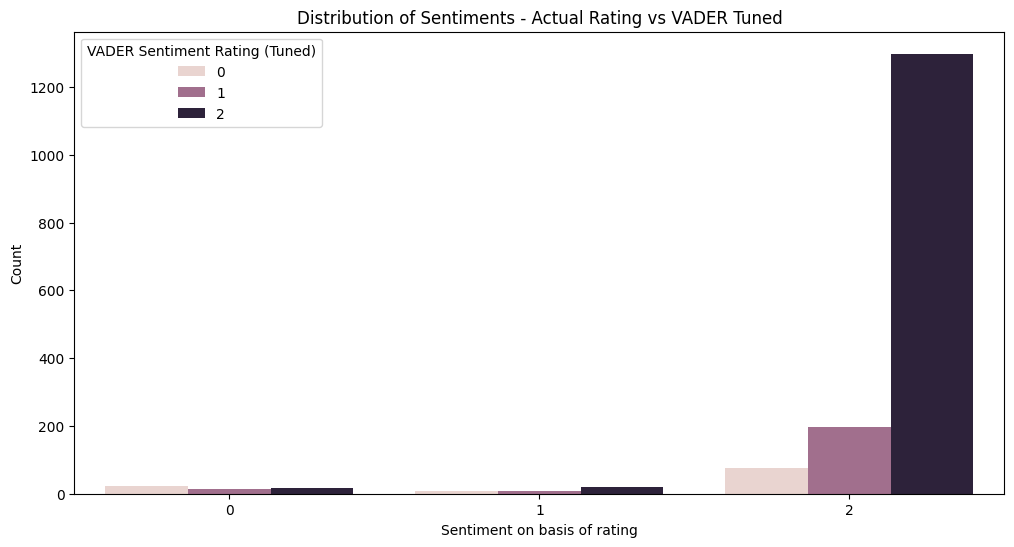

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sentiments
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Sentiment Predicted by LR model', hue='Sentiment on basis of rating')
plt.title('Distribution of Sentiments - Predicted by LR vs Actual Rating')
plt.xlabel('Sentiment Predicted by LR model')
plt.ylabel('Count')
plt.legend(title='Sentiment on basis of rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Sentiment Predicted by LR model', hue='VADER Sentiment Rating (Tuned)')
plt.title('Distribution of Sentiments - Predicted by LR vs VADER Tuned')
plt.xlabel('Sentiment Predicted by LR model')
plt.ylabel('Count')
plt.legend(title='VADER Sentiment Rating (Tuned)')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Sentiment on basis of rating', hue='VADER Sentiment Rating (Tuned)')
plt.title('Distribution of Sentiments - Actual Rating vs VADER Tuned')
plt.xlabel('Sentiment on basis of rating')
plt.ylabel('Count')
plt.legend(title='VADER Sentiment Rating (Tuned)')
plt.show()


**2. Correlation Between Sentiments:**

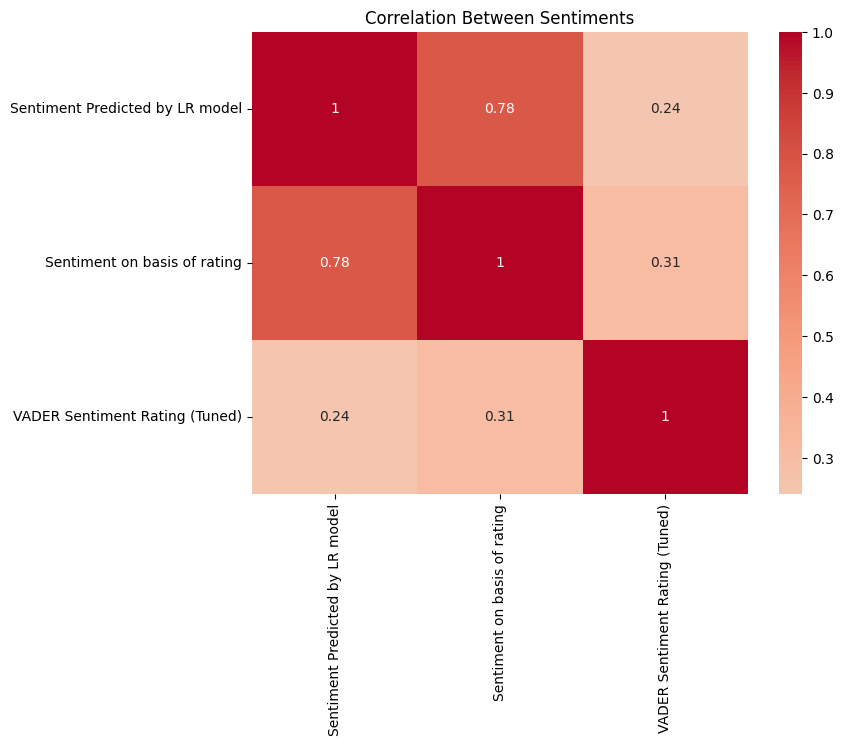

In [60]:
# Correlation Heatmap
sentiments = ['Sentiment Predicted by LR model', 'Sentiment on basis of rating', 'VADER Sentiment Rating (Tuned)']
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[sentiments].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Sentiments')
plt.show()


**3. Confusion Matrix for Predicted Sentiments:**

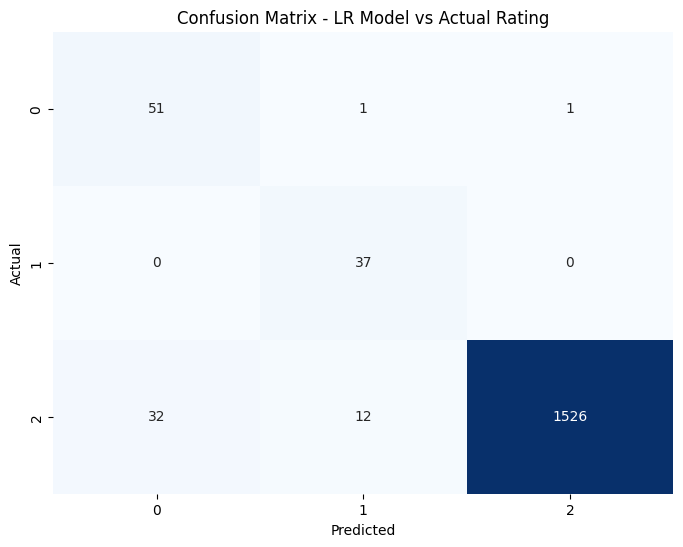

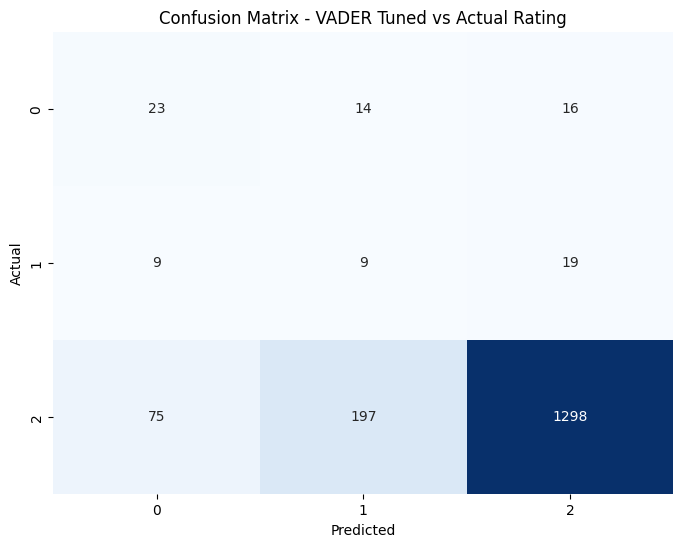

In [61]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion Matrix
conf_matrix_lg = confusion_matrix(merged_df['Sentiment on basis of rating'], merged_df['Sentiment Predicted by LR model'])
conf_matrix_vader = confusion_matrix(merged_df['Sentiment on basis of rating'], merged_df['VADER Sentiment Rating (Tuned)'])

# Plot Confusion Matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)

plot_confusion_matrix(conf_matrix_lg, 'Confusion Matrix - LR Model vs Actual Rating')
plt.show()

plot_confusion_matrix(conf_matrix_vader, 'Confusion Matrix - VADER Tuned vs Actual Rating')
plt.show()


In [62]:
# Export everything
import joblib
merged_df.to_csv('merged_df_with_predictions.csv', index=False)  # Export merged_df with predictions
joblib.dump(logreg, 'logistic_regression_model.pkl')  # Export the trained model using joblib
pd.concat([pd.DataFrame(X_train.toarray()), pd.Series(y_train)], axis=1).to_csv('train_set.csv', index=False)  # Export training set
pd.concat([pd.DataFrame(X_test.toarray()), pd.Series(y_test)], axis=1).to_csv('test_set.csv', index=False)  # Export testing set